<a href="https://colab.research.google.com/github/abdulwasaeee/KAGGLE-competitions/blob/main/santander_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('train.csv')
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [34]:
df.shape

(200000, 201)

In [5]:
df.drop('ID_code',axis=1,inplace=True)

<Axes: >

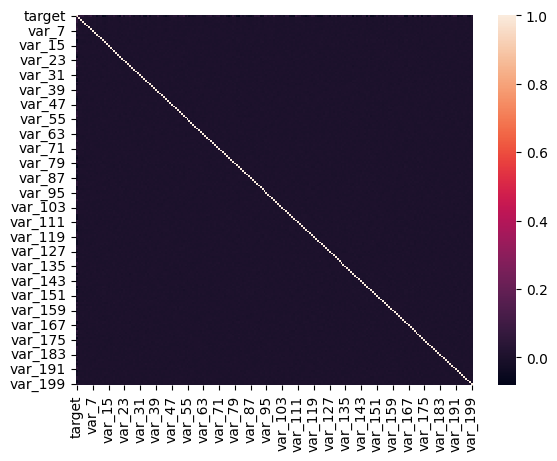

In [9]:
sns.heatmap(df.corr())

In [11]:
len(df.corr()['target'])

201

In [22]:
for i in [0.02,0.03,0.04,0.05,0.06]:
  print(np.sum((df.corr()['target']>i).astype(int)))

65
43
26
13
6


In [24]:
(65+43+26+13+6)/5

30.6

In [31]:
impvars=df.corr()['target'][ df.corr()['target'] > 0.04].index.tolist()

In [36]:
df[impvars]

,target,var_0,var_1,var_2,var_6,var_18,var_22,var_26,var_40,var_53,...,var_118,var_133,var_147,var_164,var_170,var_173,var_179,var_184,var_190,var_191
0,0,8.9255,-6.7863,11.9081,5.1187,4.2840,2.5791,-5.1488,-5.2387,5.1736,...,-13.4221,6.5674,-16.4727,6.6760,-4.7645,3.1531,1.7202,25.8398,4.4354,3.9642
1,0,11.5006,-4.1473,13.8588,5.6208,7.8000,8.5524,-11.7684,-11.1147,6.6885,...,-11.5100,7.0513,11.7700,-5.0121,5.5378,5.5134,11.0752,22.5441,7.6421,7.7214
2,0,8.6093,-2.7457,12.0805,6.9427,4.7011,1.2145,-7.9940,-13.5174,6.4059,...,-17.2738,6.6231,1.7624,-1.0410,-7.0927,-5.8234,2.4013,23.0866,2.9057,9.7905
3,0,11.0604,-2.1518,8.9522,5.8428,15.9426,6.8202,0.8135,-3.8294,5.2091,...,3.5732,7.1954,4.1622,-11.0882,-7.1541,11.7134,5.6961,-0.4639,4.4666,4.7433
4,0,9.8369,-1.4834,12.8746,5.9405,6.5263,10.1102,3.1736,-5.5963,5.7555,...,13.8224,6.6173,-12.7047,6.5769,1.4493,2.3705,5.1743,11.8503,-1.4905,9.5214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,11.4880,-0.4956,8.2622,5.6709,12.0465,1.0914,2.9085,5.9053,6.1868,...,-0.6869,7.4108,-3.3068,-6.7840,-5.3880,-5.4493,3.3580,22.7783,6.1415,13.2305
199996,0,4.9149,-2.4484,16.7052,5.8802,17.9467,0.8982,5.2281,-7.8820,4.5666,...,2.1927,6.9125,2.9866,-9.7142,2.6836,7.3478,0.4285,13.4913,4.9611,4.6549
199997,0,11.2232,-5.0518,10.5127,4.5555,23.1127,3.1008,4.9473,-8.8763,6.0771,...,-4.4543,7.1081,-0.2420,5.3500,-0.8774,-1.6530,5.4401,18.9211,4.0651,5.4414
199998,0,9.7148,-8.6098,13.6104,6.0479,14.0831,5.5803,-3.3859,-11.7669,6.2404,...,1.0591,6.5834,-10.3405,-12.6998,-7.1875,-2.5914,2.8379,11.3244,2.6840,8.6587


In [37]:
x=df[impvars].drop('target',axis=1)
x

,var_0,var_1,var_2,var_6,var_18,var_22,var_26,var_40,var_53,var_67,...,var_118,var_133,var_147,var_164,var_170,var_173,var_179,var_184,var_190,var_191
0,8.9255,-6.7863,11.9081,5.1187,4.2840,2.5791,-5.1488,-5.2387,5.1736,22.4321,...,-13.4221,6.5674,-16.4727,6.6760,-4.7645,3.1531,1.7202,25.8398,4.4354,3.9642
1,11.5006,-4.1473,13.8588,5.6208,7.8000,8.5524,-11.7684,-11.1147,6.6885,7.9344,...,-11.5100,7.0513,11.7700,-5.0121,5.5378,5.5134,11.0752,22.5441,7.6421,7.7214
2,8.6093,-2.7457,12.0805,6.9427,4.7011,1.2145,-7.9940,-13.5174,6.4059,9.8565,...,-17.2738,6.6231,1.7624,-1.0410,-7.0927,-5.8234,2.4013,23.0866,2.9057,9.7905
3,11.0604,-2.1518,8.9522,5.8428,15.9426,6.8202,0.8135,-3.8294,5.2091,23.6143,...,3.5732,7.1954,4.1622,-11.0882,-7.1541,11.7134,5.6961,-0.4639,4.4666,4.7433
4,9.8369,-1.4834,12.8746,5.9405,6.5263,10.1102,3.1736,-5.5963,5.7555,1.6184,...,13.8224,6.6173,-12.7047,6.5769,1.4493,2.3705,5.1743,11.8503,-1.4905,9.5214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,11.4880,-0.4956,8.2622,5.6709,12.0465,1.0914,2.9085,5.9053,6.1868,7.0054,...,-0.6869,7.4108,-3.3068,-6.7840,-5.3880,-5.4493,3.3580,22.7783,6.1415,13.2305
199996,4.9149,-2.4484,16.7052,5.8802,17.9467,0.8982,5.2281,-7.8820,4.5666,12.9087,...,2.1927,6.9125,2.9866,-9.7142,2.6836,7.3478,0.4285,13.4913,4.9611,4.6549
199997,11.2232,-5.0518,10.5127,4.5555,23.1127,3.1008,4.9473,-8.8763,6.0771,14.5730,...,-4.4543,7.1081,-0.2420,5.3500,-0.8774,-1.6530,5.4401,18.9211,4.0651,5.4414
199998,9.7148,-8.6098,13.6104,6.0479,14.0831,5.5803,-3.3859,-11.7669,6.2404,-2.8395,...,1.0591,6.5834,-10.3405,-12.6998,-7.1875,-2.5914,2.8379,11.3244,2.6840,8.6587


In [39]:
y=df['target']
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
199995,0
199996,0
199997,0
199998,0


In [40]:
es=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [41]:
(x.shape[1],)


(25,)

In [42]:
model= Sequential([
    Dense(128,activation='relu',input_shape=(x.shape[1],)),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.compile('adam','binary_crossentropy',metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,649 (45.50 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [48]:
history=model.fit(x,y,epochs=15,callbacks=[es])

Epoch 1/15
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8962 - loss: 0.3142
Epoch 2/15
  77/6250 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8886 - loss: 0.3213

/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


6250/6250 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9002 - loss: 0.2944
Epoch 3/15
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9016 - loss: 0.2894
Epoch 4/15
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9012 - loss: 0.2895
Epoch 5/15
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9002 - loss: 0.2901
Epoch 6/15
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9016 - loss: 0.2863
Epoch 7/15
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9003 - loss: 0.2891
Epoch 8/15
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9011 - loss: 0.2860
Epoch 9/15
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9018 - loss: 0.2855
Epoch 10/15
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8991 - loss: 0.2883
Epoch 11/15
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9012 - loss: 0.2838
Epoch 12/15
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9015 - loss: 0.2837
Epoch 13/15
6250/6250 ━━━━━━━

In [53]:
testdf=pd.read_csv('test.csv')
testdf.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [54]:
ids=testdf['ID_code']
testdf.drop('ID_code',axis=1,inplace=True)

In [59]:
impvars.remove('target')

ValueError: list.remove(x): x not in list

In [60]:
impvars

['var_0',
 'var_1',
 'var_2',
 'var_6',
 'var_18',
 'var_22',
 'var_26',
 'var_40',
 'var_53',
 'var_67',
 'var_78',
 'var_91',
 'var_94',
 'var_99',
 'var_110',
 'var_118',
 'var_133',
 'var_147',
 'var_164',
 'var_170',
 'var_173',
 'var_179',
 'var_184',
 'var_190',
 'var_191']

In [62]:
testdf=testdf[impvars]
testdf

,var_0,var_1,var_2,var_6,var_18,var_22,var_26,var_40,var_53,var_67,...,var_118,var_133,var_147,var_164,var_170,var_173,var_179,var_184,var_190,var_191
0,11.0656,7.7798,12.9536,5.8493,15.5806,1.5899,-9.4902,-15.6305,7.3213,17.4851,...,-6.6602,7.5147,-11.6827,-8.6105,4.2603,8.4685,2.2926,31.3521,-2.1556,11.8495
1,8.5304,1.2543,11.3047,6.0196,29.1609,5.2578,-5.2341,10.0309,6.8481,16.0005,...,-6.8610,7.0891,-2.2873,-10.6572,-0.7720,-5.6274,5.2110,25.1958,10.6165,8.8349
2,5.4827,-10.3581,10.1407,4.8950,21.2181,4.7473,-15.4246,-19.0841,5.6510,13.8268,...,-3.3864,6.5950,16.8588,-0.5382,-0.0391,-2.9787,4.4611,24.4721,-0.7484,10.9935
3,8.5374,-1.3222,12.0220,4.9397,2.1273,2.9707,1.0061,-4.8327,6.2536,13.0758,...,7.5397,6.7888,1.8057,-11.0780,7.2048,11.1674,1.1019,8.1154,9.5702,9.0766
4,11.7058,-0.1327,14.1295,6.8595,18.0126,6.7954,8.6228,-14.4364,5.6794,20.1344,...,4.7753,7.1434,6.8080,-11.9785,-1.6039,2.3640,6.0889,3.9829,4.2259,9.1723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,13.1678,1.0136,10.4333,4.8579,16.4220,4.0207,-12.4547,-2.7215,6.4420,15.6292,...,3.2861,6.9553,8.7344,-3.0267,-6.3101,5.0331,7.3865,12.3183,2.0544,9.6849
199996,9.7171,-9.1462,7.3443,5.6888,11.4428,5.5064,0.0592,-12.1092,6.2642,14.8157,...,-13.8603,6.6422,-13.0327,-2.9063,0.0289,6.5891,-1.7399,26.2435,5.0071,6.6548
199997,11.6360,2.2769,11.2074,5.3883,15.4767,0.6066,-9.1787,-5.9079,6.2427,4.4730,...,-15.1198,6.7956,-10.6833,-1.9905,-5.8944,-13.1990,-2.9957,1.7004,5.1536,2.6498
199998,13.5745,-0.5134,13.6584,4.1959,14.3151,1.1101,3.6157,1.9454,4.9431,4.2432,...,9.9258,7.0122,-1.9175,-0.4352,-5.8704,2.2206,2.5477,-0.9905,3.4259,8.5012


In [63]:
testdf=scaler.transform(testdf)

In [64]:
preds=model.predict(testdf)

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


In [66]:
preds.shape

(200000, 1)

In [73]:
(preds>0.5).astype(int).flatten().shape

(200000,)

In [75]:
submission=pd.DataFrame({
    'ID_code': ids,
    'target': (preds>0.5).astype(int).flatten()

})

In [76]:
submission.to_csv('submission.csv',index=False)